In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
user_data = pd.read_csv('/home/jupyter-t-varenichenko-22/My practice/Lesson 3/3_user_data.csv')
logs = pd.read_csv('/home/jupyter-t-varenichenko-22/My practice/Lesson 3/3_logs.csv')

In [5]:
user_data.shape

(2954, 3)

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
logs.shape

(4500, 4)

In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Сколько уникальных значений принимает переменная platform

In [10]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [25]:
logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success':'count'}) \
    .sort_values(['success', 'client'], ascending =[False, True]) \
    .head(10) # после сортировки можно узнать max, чтобы вывести число успешных, а потом уже брать первые 10
    .reset_index() \
    .client \
    .tolist()

# другим способом:
# logs.query('success == True').client.value_counts().head(9).index.to_list()

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41
1826,64064,40


С какой платформы осуществляется наибольшее количество успешных операций?

In [56]:
logs.query('success == True')\
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success', ascending = False) 

# logs.query('success == True').platform.value_counts().idxmax() другим способом

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [5]:
new_data = user_data.merge(logs, on = 'client')
new_data.query('premium == True')\
    .agg({'platform' : 'value_counts'})

,platform
phone,246
computer,150
tablet,24


Визуализируем распределение возраста клиентов в зависимости от типа клиента

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


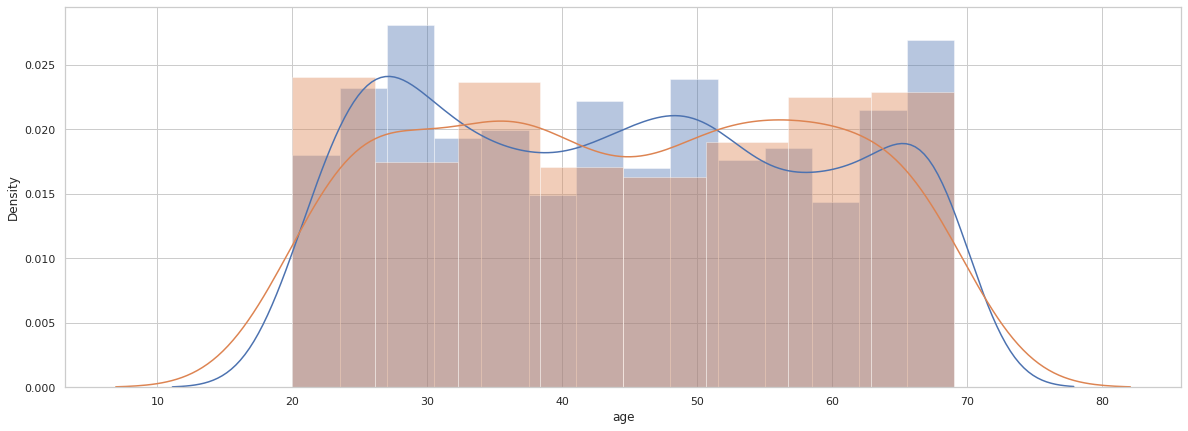

In [26]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
ax = sns.distplot(new_data.query('premium == False').age)
ax = sns.distplot(new_data.query('premium == True').age)

Визуализируем число успешных операций, сделанных на платформе computer

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


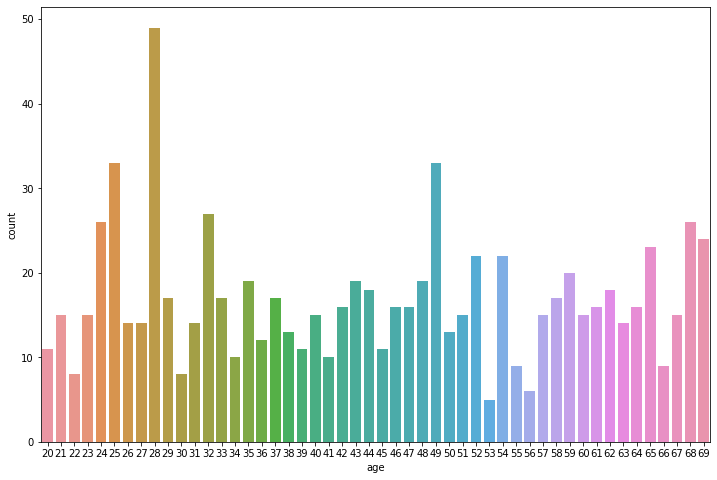

In [12]:
age_success = new_data.query("success == True & platform == 'computer'")
plt.figure(figsize=(12, 8)) #увеличили размер
ax = sns.countplot(age_success.age)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


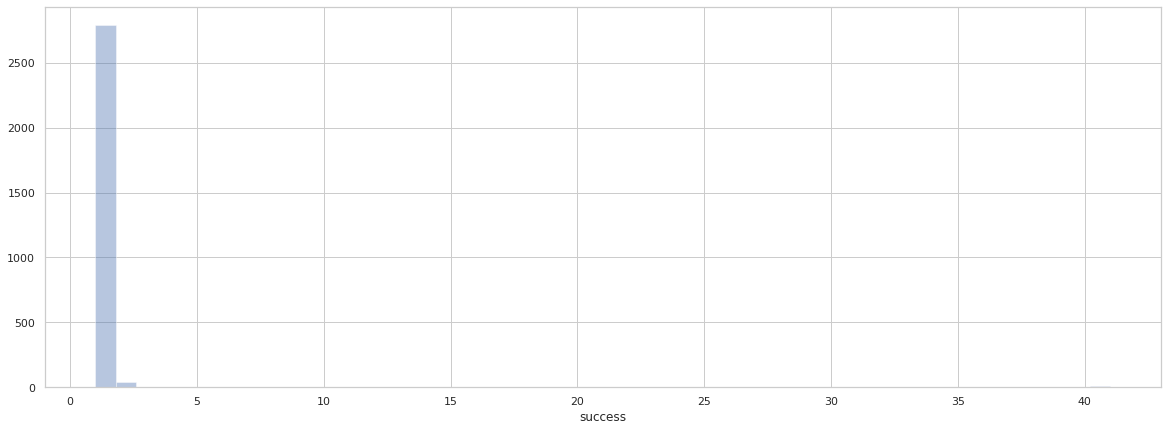

In [27]:
#  График распределения числа успешных операций 
#(число успешных операций\ число клиентов, совершивших столько успешных операций)

df = logs.query('success == True') \
    .groupby('client').agg('sum').success
# Колв-во операций - кол-во клиентов, которые их совершили:
logs.query('success == True') \
    .groupby('client').agg('sum').success.value_counts()

# Строим график:

sns.set(style='whitegrid',rc={'figure.figsize':(20,7)})
ax = sns.distplot(df, kde=False)
